In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('../data/startup_data.csv')

In [6]:
df.head()

,Startup Name,Industry,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded,Region,Exit Status
0,Startup_1,IoT,1,101.09,844.75,67.87,1468,5.20,0,2006,Europe,Private
1,Startup_2,EdTech,1,247.62,3310.83,75.65,3280,8.10,1,2003,South America,Private
2,Startup_3,EdTech,1,109.24,1059.37,84.21,4933,2.61,1,1995,South America,Private
3,Startup_4,Gaming,5,10.75,101.90,47.08,1059,2.53,0,2003,South America,Private
4,Startup_5,IoT,4,249.28,850.11,50.25,1905,4.09,0,1997,Europe,Acquired


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Startup Name            500 non-null    object 
 1   Industry                500 non-null    object 
 2   Funding Rounds          500 non-null    int64  
 3   Funding Amount (M USD)  500 non-null    float64
 4   Valuation (M USD)       500 non-null    float64
 5   Revenue (M USD)         500 non-null    float64
 6   Employees               500 non-null    int64  
 7   Market Share (%)        500 non-null    float64
 8   Profitable              500 non-null    int64  
 9   Year Founded            500 non-null    int64  
 10  Region                  500 non-null    object 
 11  Exit Status             500 non-null    object 
dtypes: float64(4), int64(4), object(4)
memory usage: 47.0+ KB


In [8]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

In [9]:
df['is_unicorn'] = df['valuation_(m_usd)'].apply(lambda x: 1 if x >= 1000 else 0)

In [10]:
df[df['is_unicorn'] == 1].sort_values(by='valuation_(m_usd)', ascending=False).head(10)


,startup_name,industry,funding_rounds,funding_amount_(m_usd),valuation_(m_usd),revenue_(m_usd),employees,market_share_(%),profitable,year_founded,region,exit_status,is_unicorn
384,Startup_385,Gaming,2,293.25,4357.49,47.48,4001,3.03,0,2022,Asia,Private,1
225,Startup_226,EdTech,3,288.66,4264.90,9.39,1016,5.22,0,2006,North America,Private,1
364,Startup_365,E-Commerce,4,285.82,4137.15,78.70,2571,8.30,1,2009,Asia,Acquired,1
108,Startup_109,E-Commerce,2,299.81,4125.56,77.21,2813,7.56,1,1998,South America,Acquired,1
397,Startup_398,E-Commerce,2,280.59,4110.36,27.85,984,3.52,1,2011,North America,IPO,1
51,Startup_52,E-Commerce,1,287.61,4110.09,49.67,1561,5.49,1,2020,South America,Private,1
398,Startup_399,IoT,1,284.23,4066.70,81.69,4534,4.20,1,2017,Europe,Private,1
94,Startup_95,E-Commerce,3,287.47,4016.20,27.63,887,8.97,0,1995,Australia,Private,1
252,Startup_253,FinTech,2,263.78,3774.33,61.42,2229,4.55,0,2000,Asia,Private,1
360,Startup_361,E-Commerce,5,292.42,3721.99,64.00,1529,2.62,1,2016,South America,IPO,1


In [11]:
df.groupby('industry')['is_unicorn'].sum().sort_values(ascending=False)

industry
FinTech          48
Gaming           45
E-Commerce       44
EdTech           44
AI               32
IoT              32
Cybersecurity    31
HealthTech       23
Name: is_unicorn, dtype: int64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


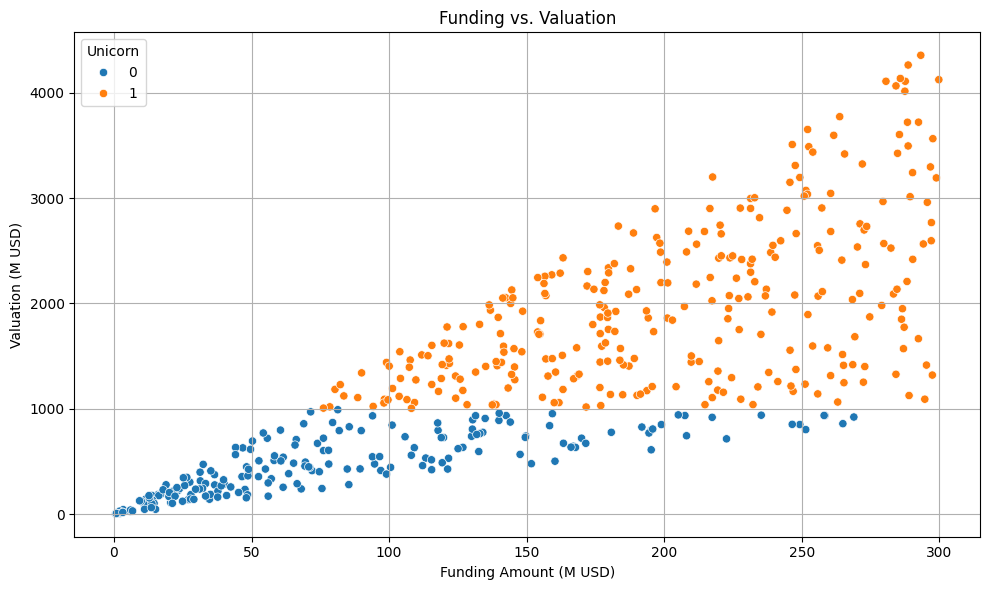

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='funding_amount_(m_usd)', y='valuation_(m_usd)', hue='is_unicorn')
plt.title('Funding vs. Valuation')
plt.xlabel('Funding Amount (M USD)')
plt.ylabel('Valuation (M USD)')
plt.legend(title='Unicorn')
plt.grid(True)
plt.tight_layout()
plt.show()

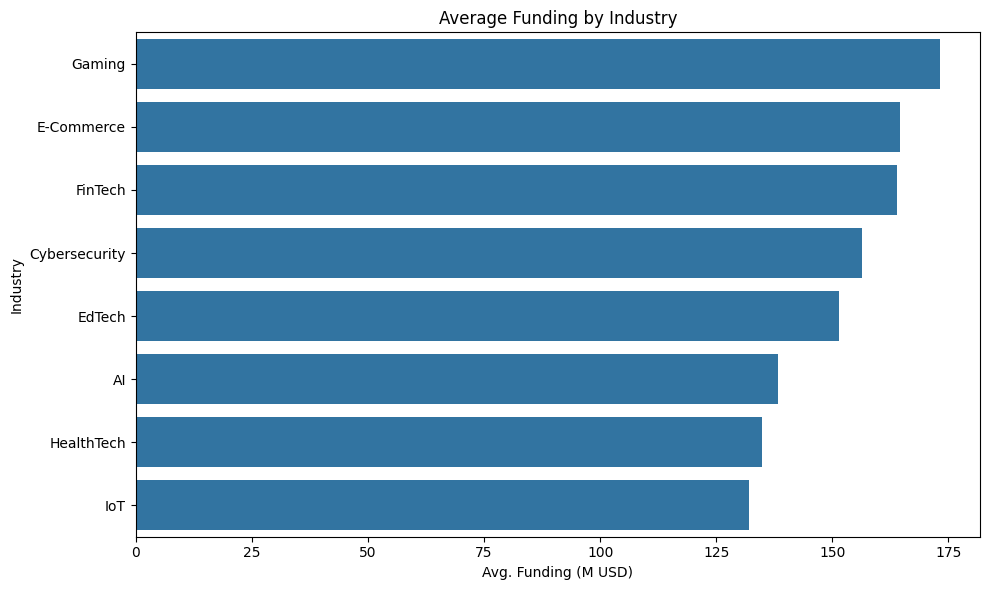

In [16]:
avg_funding = df.groupby('industry')['funding_amount_(m_usd)'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_funding.values, y=avg_funding.index)
plt.title('Average Funding by Industry')
plt.xlabel('Avg. Funding (M USD)')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()


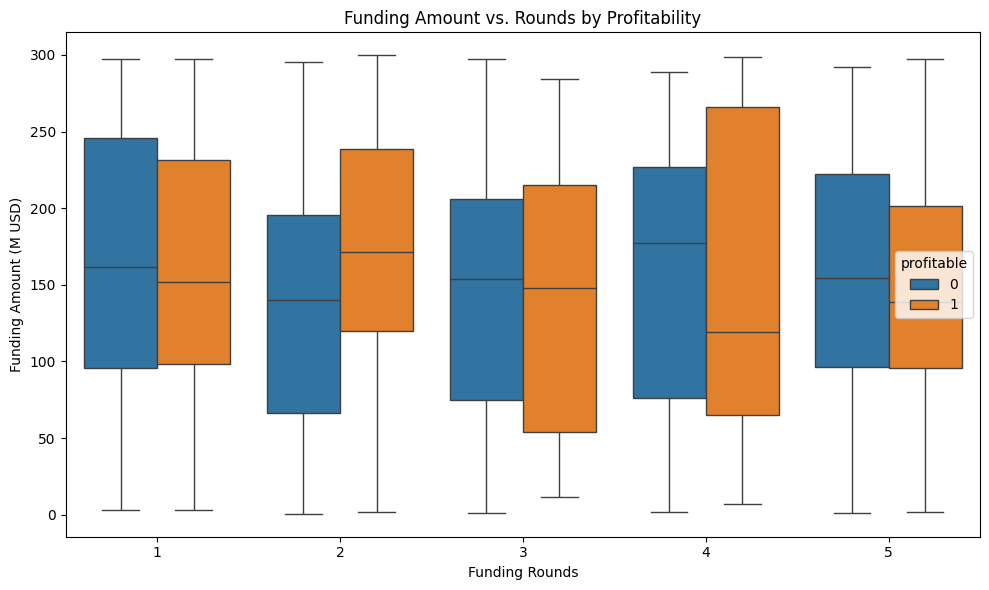

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x='funding_rounds', y='funding_amount_(m_usd)', hue='profitable', data=df)
plt.title('Funding Amount vs. Rounds by Profitability')
plt.xlabel('Funding Rounds')
plt.ylabel('Funding Amount (M USD)')
plt.tight_layout()
plt.show()


In [18]:
# Revenue-to-Funding Ratio
df['revenue_to_funding'] = df['revenue_(m_usd)'] / df['funding_amount_(m_usd)']

# Valuation Efficiency
df['valuation_per_employee'] = df['valuation_(m_usd)'] / df['employees']


In [29]:
from sklearn.preprocessing import MinMaxScaler

# Select features for scoring
features = df[['valuation_(m_usd)', 'revenue_to_funding', 'profitable', 'market_share_(%)', 'valuation_per_employee']].copy()

# Fill any missing or infinite values
features.replace([float('inf'), -float('inf')], 0, inplace=True)
features.fillna(0, inplace=True)

# Normalize using MinMaxScaler
scaler = MinMaxScaler()
normalized = scaler.fit_transform(features)
normalized_df = pd.DataFrame(normalized, columns=features.columns)

# Apply weights
weights = {
    'valuation_(m_usd)': 0.30,
    'revenue_to_funding': 0.25,
    'profitable': 0.20,
    'market_share_(%)': 0.15,
    'valuation_per_employee': 0.10
}

# Calculate Unicorn Score
df['unicorn_score'] = sum(normalized_df[col] * weight for col, weight in weights.items())

# Show top 10 startups by unicorn potential
df[['startup_name', 'industry', 'unicorn_score']].sort_values(by='unicorn_score', ascending=False).head(10)


,startup_name,industry,unicorn_score
364,Startup_365,E-Commerce,0.610864
108,Startup_109,E-Commerce,0.598709
201,Startup_202,Gaming,0.568128
51,Startup_52,E-Commerce,0.566885
282,Startup_283,Gaming,0.565731
273,Startup_274,E-Commerce,0.563708
179,Startup_180,FinTech,0.555296
217,Startup_218,E-Commerce,0.552806
1,Startup_2,EdTech,0.550567
398,Startup_399,IoT,0.543421


In [30]:
unicorn_count = df[df['valuation_(m_usd)'] >= 1000].shape[0]
total_startups = df.shape[0]
unicorn_percentage = round((unicorn_count / total_startups) * 100, 2)
print(f"Unicorns: {unicorn_count} / {total_startups} → {unicorn_percentage}%")


Unicorns: 299 / 500 → 59.8%


In [31]:
unicorns_by_industry = df[df['valuation_(m_usd)'] >= 1000].groupby('industry').size()
industry_counts = df.groupby('industry').size()
industry_unicorn_percent = (unicorns_by_industry / industry_counts * 100).sort_values(ascending=False)
print(industry_unicorn_percent)


industry
Gaming           72.580645
FinTech          67.605634
E-Commerce       62.857143
Cybersecurity    60.784314
EdTech           59.459459
IoT              52.459016
AI               51.612903
HealthTech       46.938776
dtype: float64


In [32]:
correlation = df.corr(numeric_only=True)['is_unicorn'].sort_values(ascending=False)
print(correlation)


is_unicorn                1.000000
valuation_(m_usd)         0.768832
funding_amount_(m_usd)    0.692678
unicorn_score             0.406937
valuation_per_employee    0.121064
employees                 0.058189
profitable                0.048025
revenue_(m_usd)           0.044760
market_share_(%)          0.037203
year_founded             -0.018415
funding_rounds           -0.057926
revenue_to_funding       -0.209794
Name: is_unicorn, dtype: float64


In [33]:
df[['funding_amount_(m_usd)', 'valuation_(m_usd)']].corr()


,funding_amount_(m_usd),valuation_(m_usd)
funding_amount_(m_usd),1.000000,0.795061
valuation_(m_usd),0.795061,1.000000


In [34]:
df['valuation_to_funding'] = df['valuation_(m_usd)'] / df['funding_amount_(m_usd)']
efficiency_by_industry = df.groupby('industry')['valuation_to_funding'].mean().sort_values()
print(efficiency_by_industry)


industry
AI               7.949589
EdTech           8.801697
HealthTech       8.825191
Gaming           8.936870
FinTech          8.972714
Cybersecurity    8.992558
IoT              9.062564
E-Commerce       9.664959
Name: valuation_to_funding, dtype: float64


In [35]:
low_performers = df.groupby('industry')[['revenue_to_funding', 'profitable']].mean().sort_values(by='revenue_to_funding')
print(low_performers)


               revenue_to_funding  profitable
industry                                     
Cybersecurity            0.562115    0.313725
E-Commerce               0.620487    0.542857
AI                       0.755923    0.467742
EdTech                   0.893782    0.459459
IoT                      0.932113    0.524590
FinTech                  1.099322    0.338028
Gaming                   2.247928    0.338710
HealthTech               3.811351    0.448980
